In [64]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data=pd.read_csv('salary_Data_Based_country_and_race.csv')
data.head()
data.shape

(6704, 9)

In [66]:
data.shape

(6704, 9)

In [67]:
#dropping null values
data.dropna(axis=0, inplace=True)

In [68]:
data.drop(columns='Unnamed: 0')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [69]:
data.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [70]:
data.dtypes

Unnamed: 0               int64
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [71]:


data.nunique()

Unnamed: 0             6698
Age                      41
Gender                    3
Education Level           7
Job Title               191
Years of Experience      37
Salary                  444
Country                   5
Race                     10
dtype: int64

In [72]:
data['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [73]:
data['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

## Grouping Job Title

In [74]:

def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

data['Job Title'] = data['Job Title'].apply(categorize_job_title)

In [75]:
data

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software/Developer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Manager/Director/VP,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Manager/Director/VP,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Manager/Director/VP,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Manager/Director/VP,14.0,140000.0,China,Korean


In [76]:
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [77]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

data['Education Level'] = data['Education Level'].apply(group_education) 

In [78]:
data

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Manager/Director/VP,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelors,Manager/Director/VP,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Masters,Manager/Director/VP,14.0,140000.0,China,Korean


In [79]:
data['Age'].max()

62.0

In [80]:
data['Years of Experience'].max()

34.0

In [81]:
#Grouping Age
data.loc[data['Age'].between(0,30), 'Age Group']='below 30'
data.loc[data['Age'].between(30,39), 'Age Group']='30-39'
data.loc[data['Age'].between(40,49), 'Age Group']='40-49'
data.loc[data['Age'].between(50,59), 'Age Group']='50-59'
data.loc[data['Age'].between(60,100), 'Age Group']='60+'


In [82]:
#Grouping Experience
data.loc[data['Years of Experience'].between(0,10), 'Experience Group']='Below 10'
data.loc[data['Years of Experience'].between(10,21), 'Experience Group']='10-21'
data.loc[data['Years of Experience'].between(21,31), 'Experience Group']='21-31'
data.loc[data['Years of Experience'].between(31,100), 'Experience Group']='31-100'

In [83]:
data

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Age Group,Experience Group
0,0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White,30-39,Below 10
1,1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic,below 30,Below 10
2,2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White,40-49,10-21
3,3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic,30-39,Below 10
4,4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian,50-59,10-21
...,...,...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Manager/Director/VP,20.0,200000.0,UK,Mixed,40-49,10-21
6700,6700,32.0,Male,High School,Sales,3.0,50000.0,Australia,Australian,30-39,Below 10
6701,6701,30.0,Female,Bachelors,Manager/Director/VP,4.0,55000.0,China,Chinese,30-39,Below 10
6702,6702,46.0,Male,Masters,Manager/Director/VP,14.0,140000.0,China,Korean,40-49,10-21


## EDA of Age

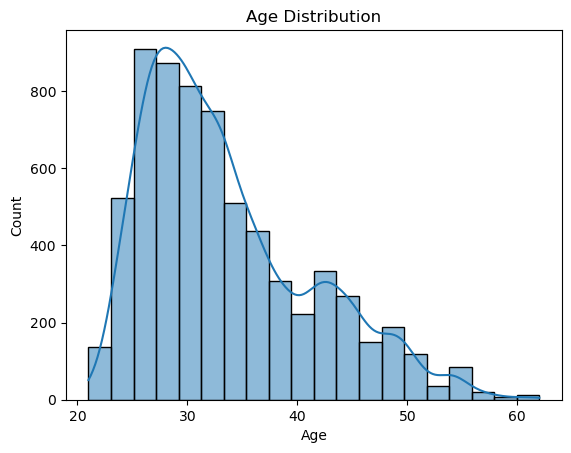

In [84]:
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='Age Group', ylabel='count'>

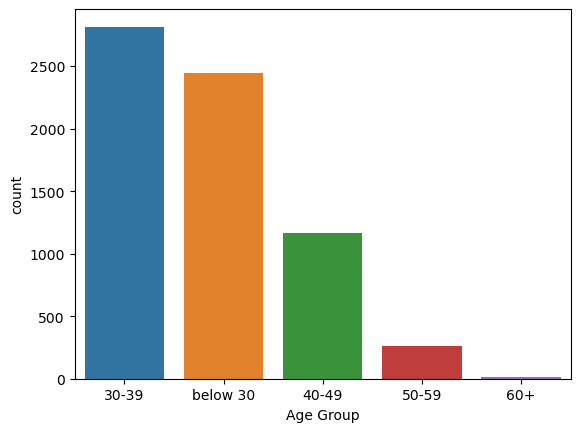

In [85]:
sns.countplot(data=data, x='Age Group')

In [86]:
data['Age Group'].value_counts()

Age Group
30-39       2815
below 30    2443
40-49       1163
50-59        265
60+           12
Name: count, dtype: int64

<Axes: xlabel='Age Group', ylabel='count'>

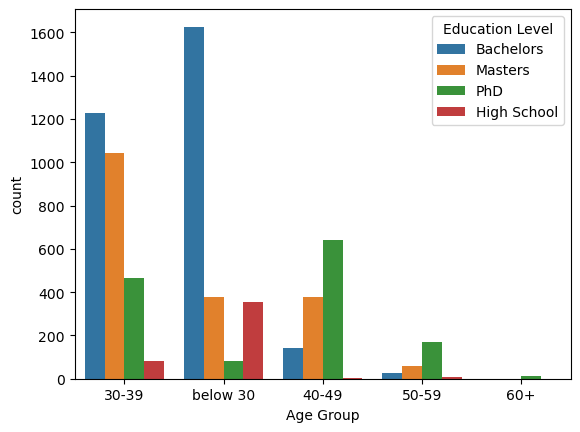

In [87]:
sns.countplot(data=data, x='Age Group', hue='Education Level')

In [88]:
data['Education Level'].unique()

array(['Bachelors', 'Masters', 'PhD', 'High School'], dtype=object)

In [89]:
data.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race', 'Age Group',
       'Experience Group'],
      dtype='object')

<Axes: xlabel='Race', ylabel='Count'>

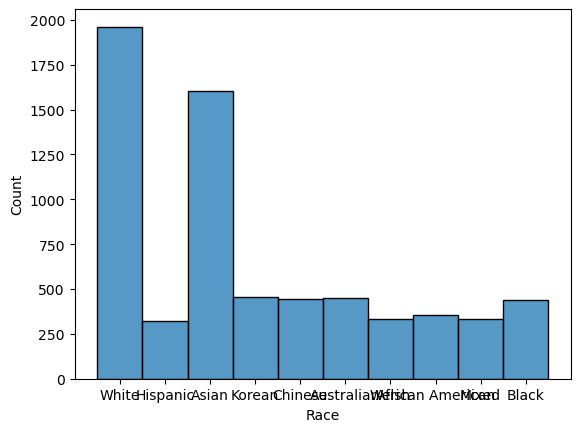

In [90]:
sns.histplot(data=data, x='Race', bins='10')

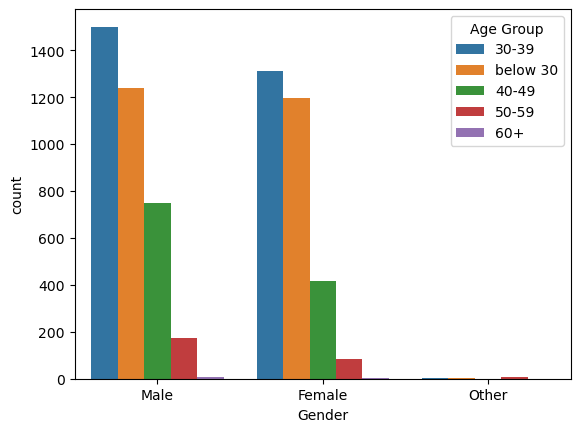

In [91]:
sns.countplot(data=data, x='Gender', hue='Age Group')
plt.show()

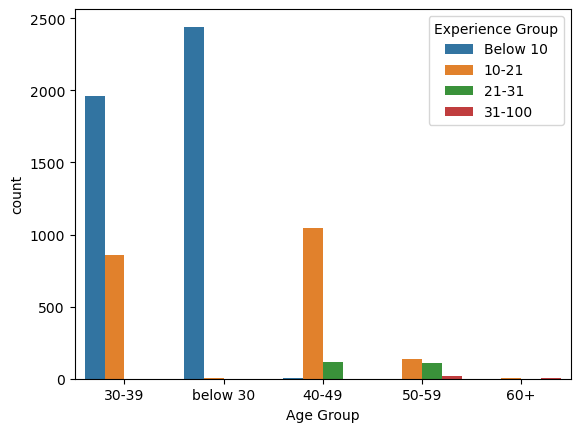

In [92]:
sns.countplot(data=data, x='Age Group', hue='Experience Group')
plt.show()

Text(0.5, 1.0, 'Level of Education in Various Countries')

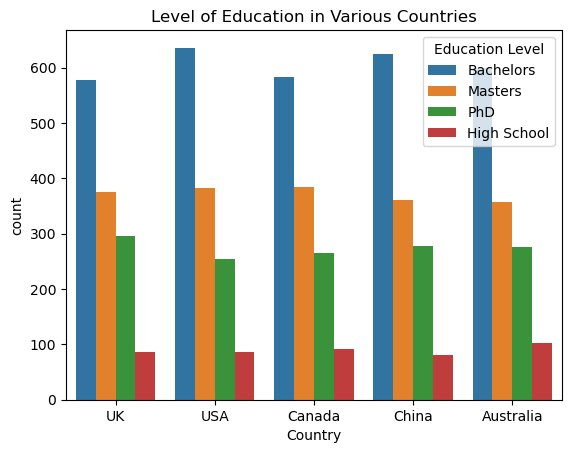

In [93]:
sns.countplot(data=data, x='Country', hue='Education Level')
plt.title('Level of Education in Various Countries')

In [94]:
data.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race', 'Age Group',
       'Experience Group'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

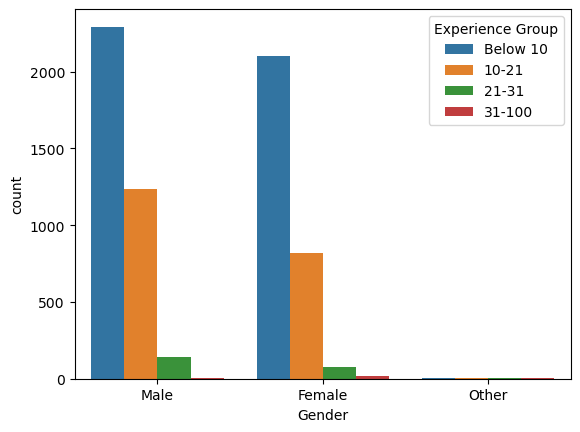

In [95]:
sns.countplot(data=data, x='Gender', hue='Experience Group')

Text(0.5, 1.0, 'Race vs Country')

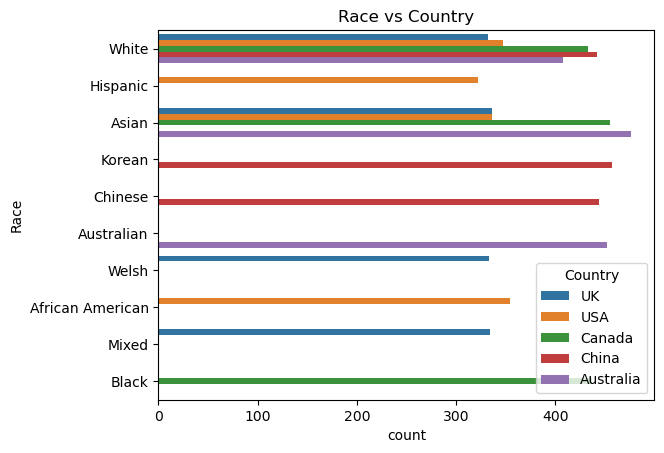

In [96]:
sns.countplot(data=data, y='Race', hue='Country')
plt.title('Race vs Country')

<Axes: xlabel='Age Group', ylabel='count'>

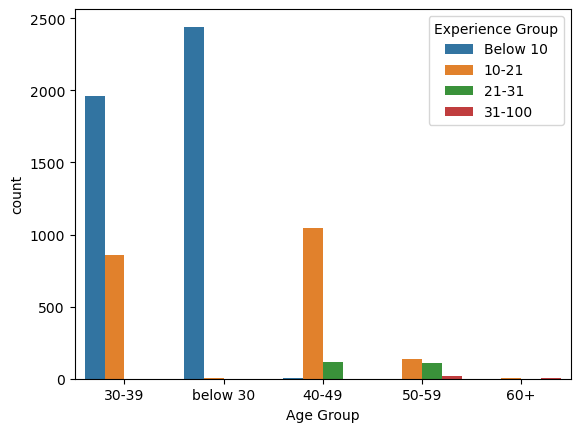

In [97]:
sns.countplot(data=data, x='Age Group', hue='Experience Group')

<Axes: xlabel='Gender', ylabel='count'>

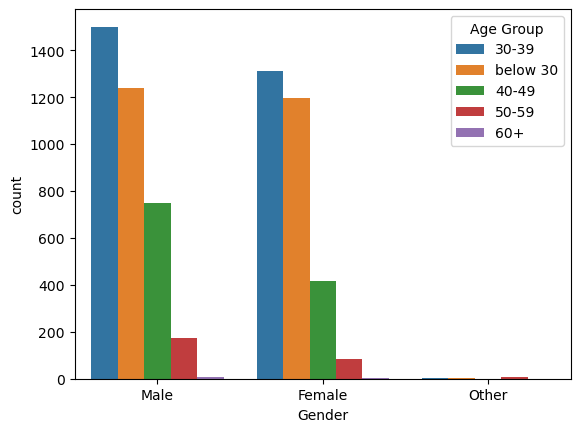

In [98]:
sns.countplot(data=data, x='Gender', hue='Age Group')

<Axes: xlabel='Age Group', ylabel='count'>

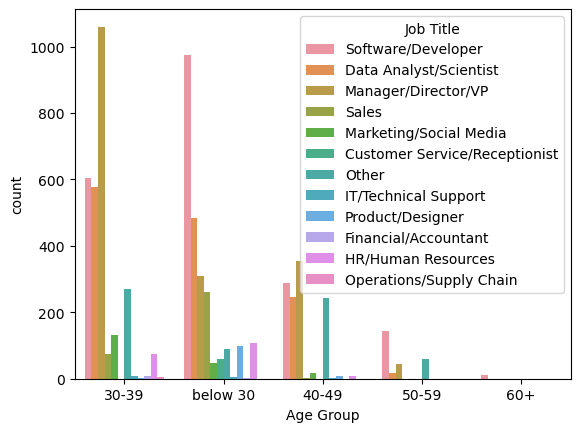

In [99]:
sns.countplot(x='Age Group', hue='Job Title', data=data)

<Axes: xlabel='Age Group', ylabel='count'>

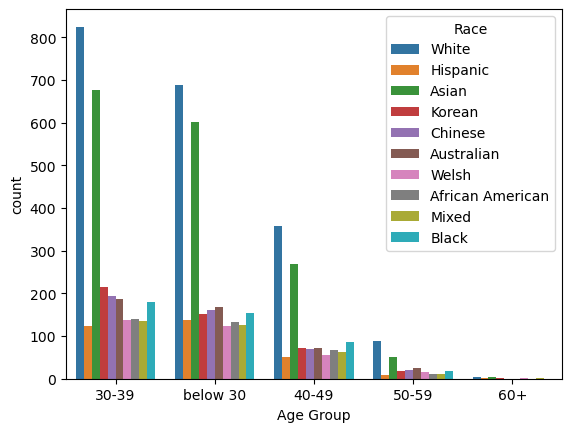

In [100]:
sns.countplot(data=data, x='Age Group', hue='Race')

## Scatter Plot between Age and Salary

Text(0.5, 1.0, 'Age vs Salary')

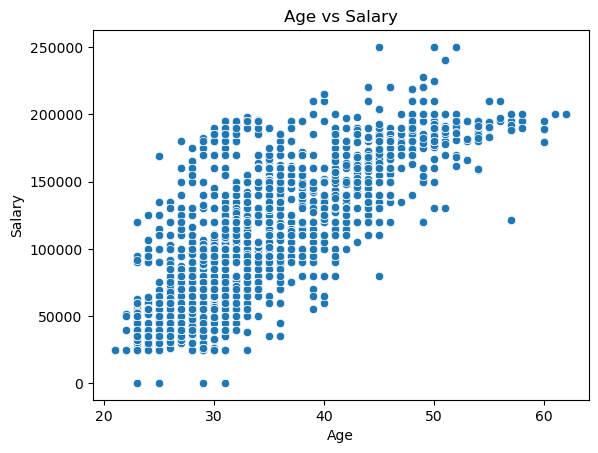

In [101]:
sns.scatterplot(x = 'Age', y='Salary', data=data)
plt.title('Age vs Salary')

Text(0.5, 1.0, 'Age Group vs Salary')

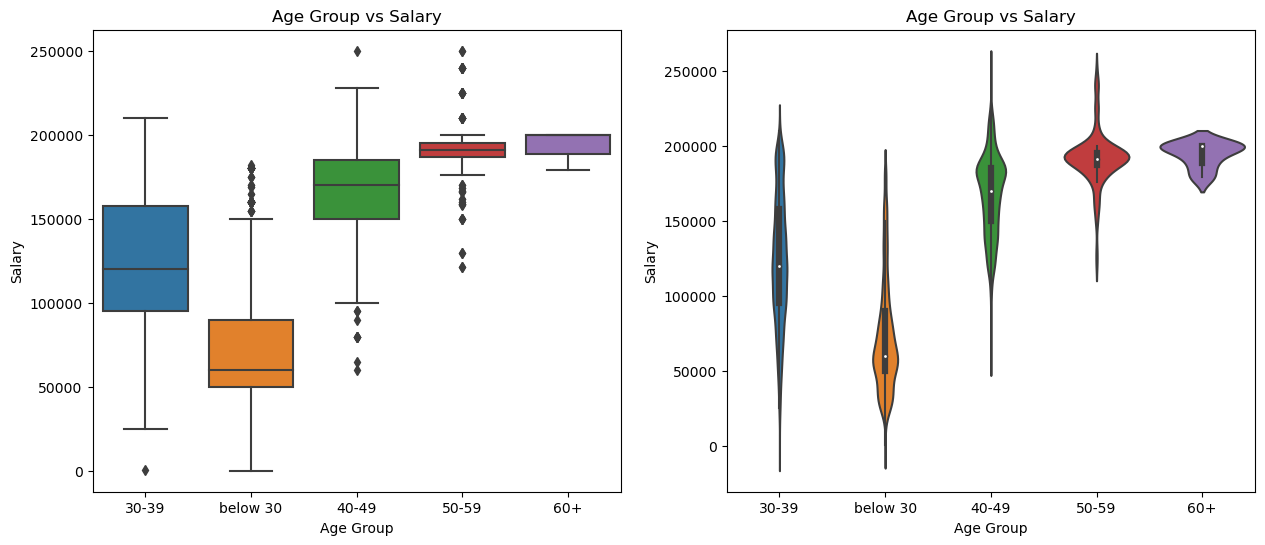

In [102]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Age Group', y = 'Salary', data = data, ax=ax[0]).set_title('Age Group vs Salary')
sns.violinplot(x = 'Age Group', y = 'Salary', data = data, ax=ax[1]).set_title('Age Group vs Salary')

Text(0.5, 1.0, 'Years of Experience vs Salary')

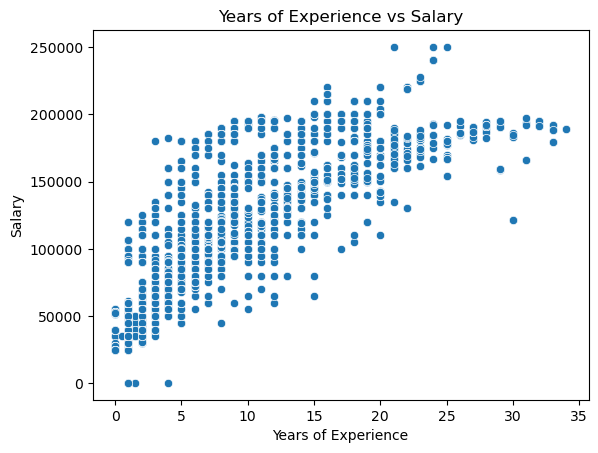

In [103]:
sns.scatterplot(data=data, x='Years of Experience', y='Salary')
plt.title('Years of Experience vs Salary')

Text(0.5, 1.0, 'Job Title vs Salary')

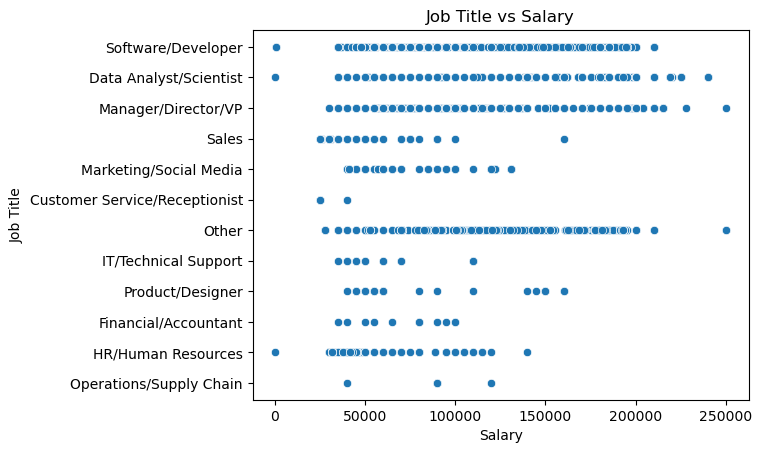

In [104]:
sns.scatterplot(data=data, y='Job Title', x='Salary')
plt.title('Job Title vs Salary')

Text(0.5, 1.0, 'Education Level vs Salary')

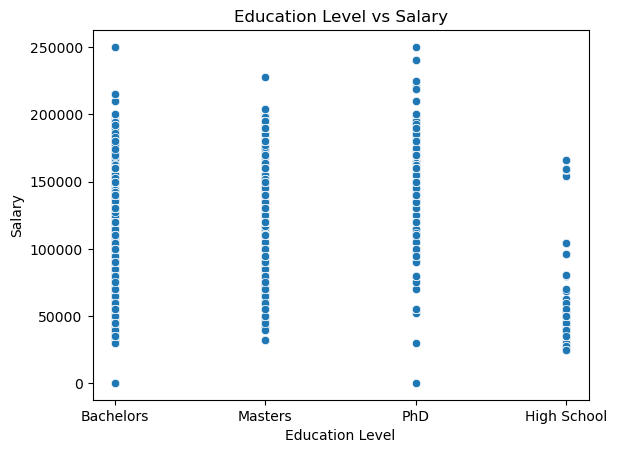

In [105]:
sns.scatterplot(data=data, x='Education Level', y='Salary')
plt.title('Education Level vs Salary')

Text(0.5, 1.0, 'Age vs Years of Experience')

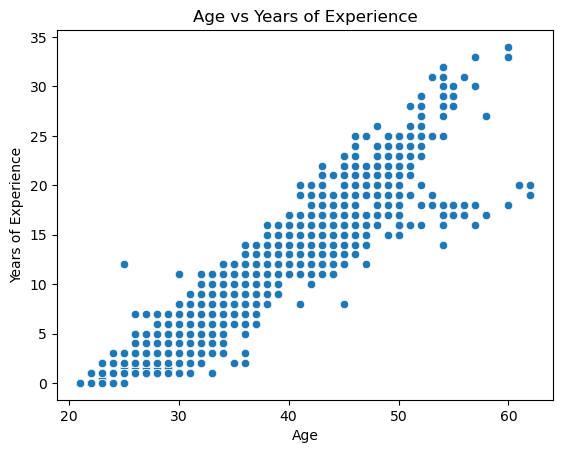

In [119]:
sns.scatterplot(data=data, y='Years of Experience', x='Age')
plt.title('Age vs Years of Experience')

<Axes: xlabel='Country', ylabel='Salary'>

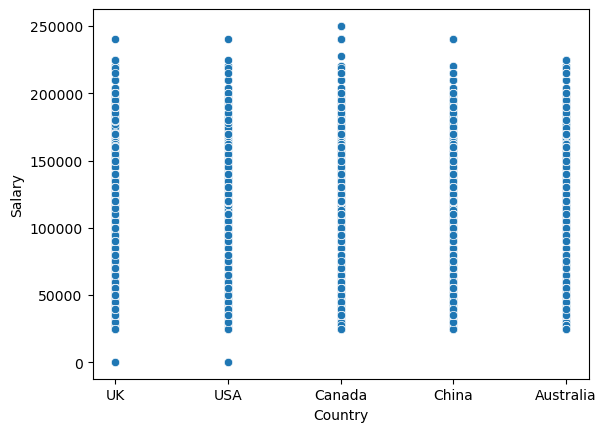

In [107]:
sns.scatterplot(data=data, x='Country', y='Salary')

<Axes: xlabel='Gender', ylabel='Salary'>

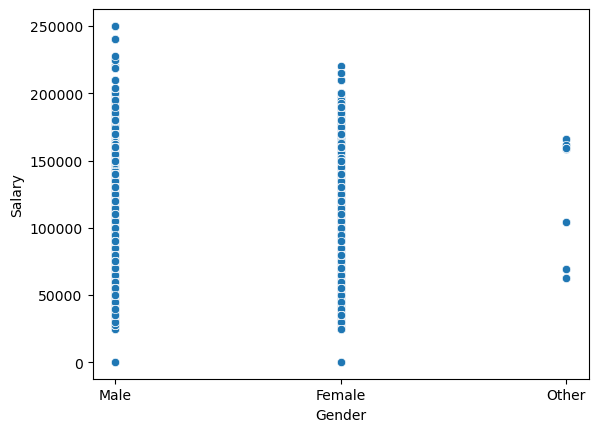

In [108]:
sns.scatterplot(data=data, x='Gender', y='Salary')

Text(0.5, 1.0, 'Experience vs Salary')

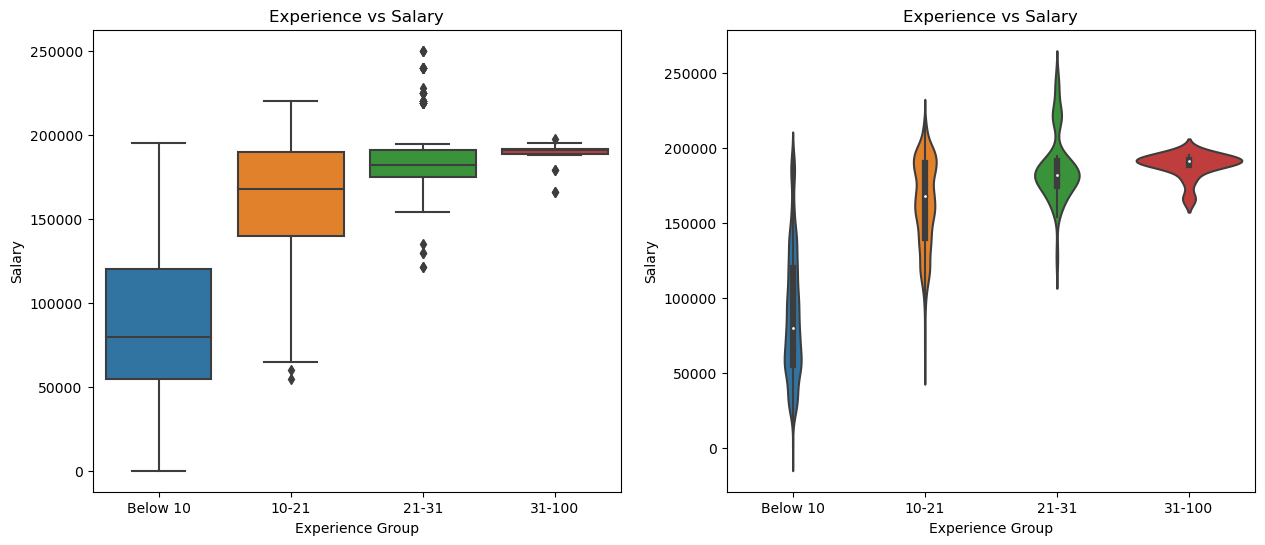

In [109]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Experience Group', y = 'Salary', data = data, ax=ax[0]).set_title('Experience vs Salary')
sns.violinplot(x = 'Experience Group', y = 'Salary', data = data, ax=ax[1]).set_title('Experience vs Salary')

Text(0.5, 1.0, 'Education Level vs Salary')

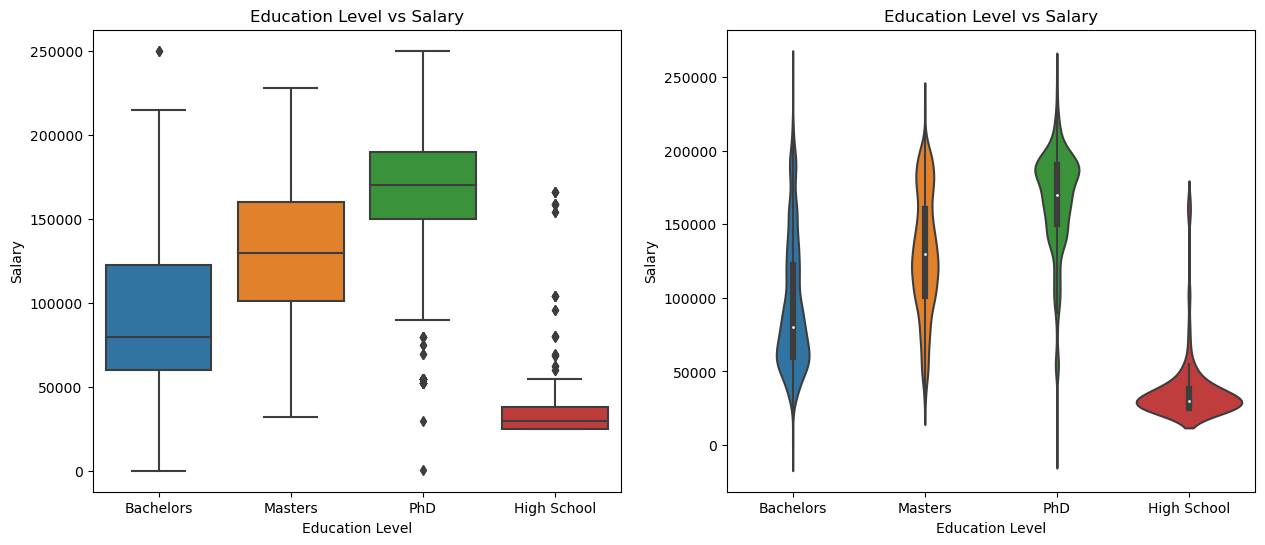

In [110]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = data, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = data, ax=ax[1]).set_title('Education Level vs Salary')

In [111]:
data.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race', 'Age Group',
       'Experience Group'],
      dtype='object')

Text(0.5, 1.0, 'Age Group vs Salary')

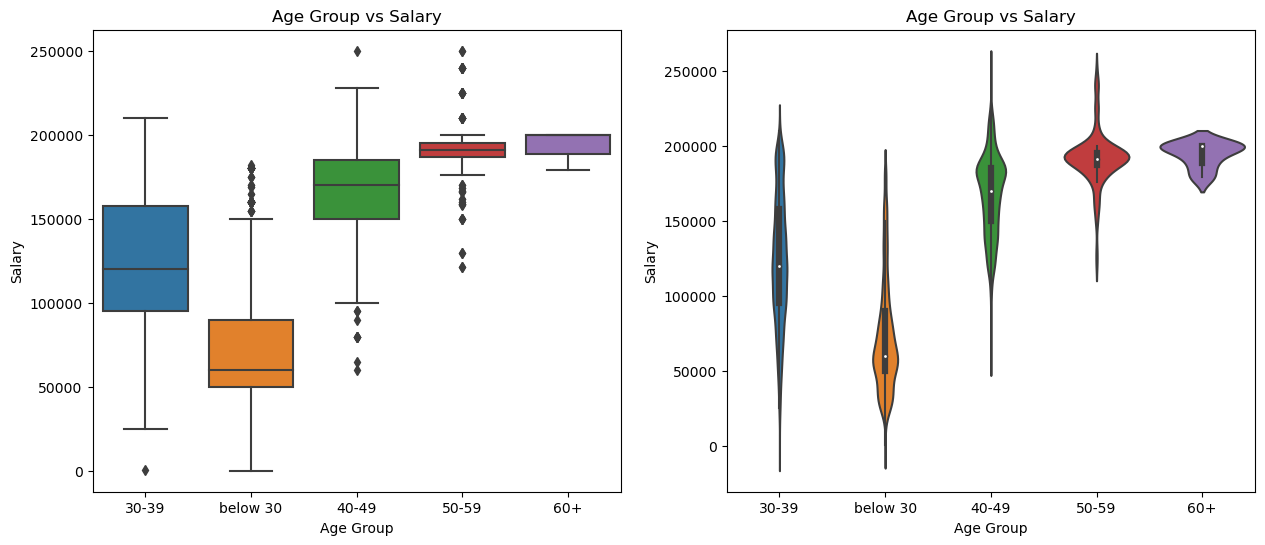

In [112]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Age Group', y = 'Salary', data = data, ax=ax[0]).set_title('Age Group vs Salary')
sns.violinplot(x = 'Age Group', y = 'Salary', data = data, ax=ax[1]).set_title('Age Group vs Salary')

Text(0.5, 1.0, 'Job Title vs Age')

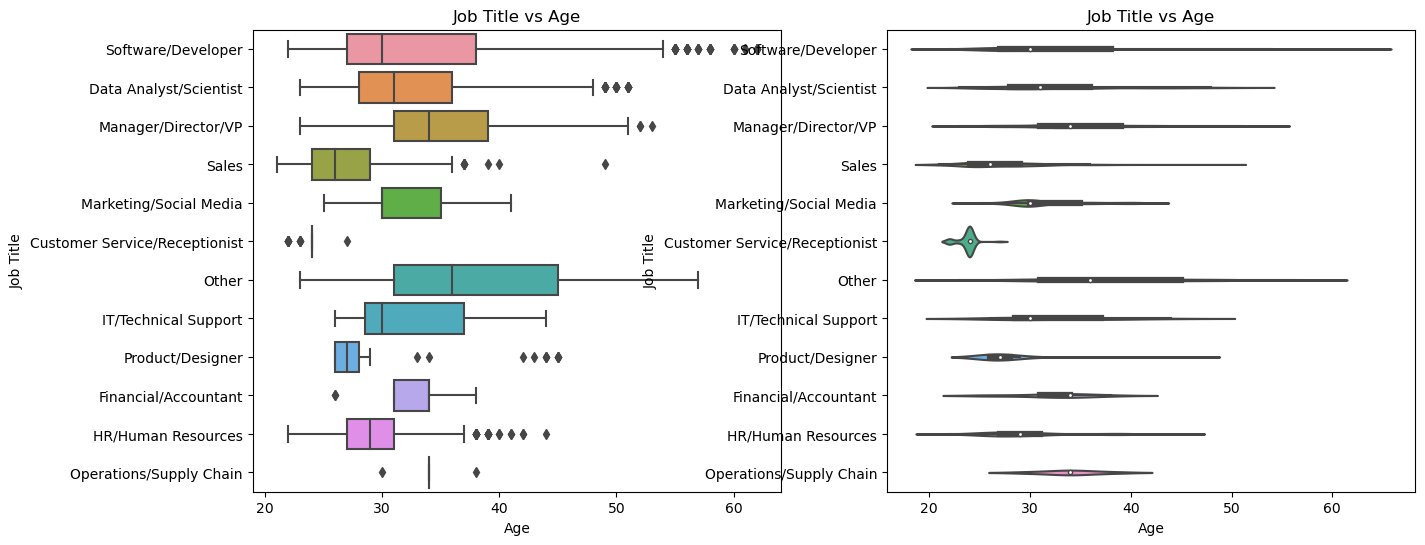

In [113]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(y = 'Job Title', x = 'Age', data = data, ax=ax[0]).set_title('Job Title vs Age')
sns.violinplot(y = 'Job Title', x = 'Age', data = data, ax=ax[1]).set_title('Job Title vs Age')

Text(0.5, 1.0, 'Gender vs Salary')

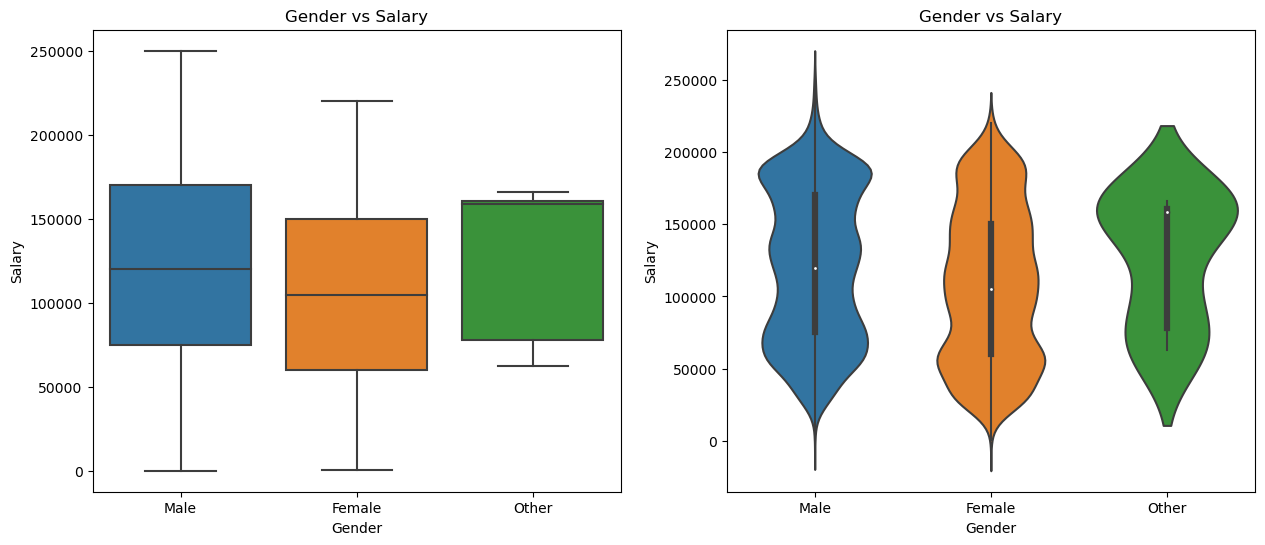

In [120]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Gender', y = 'Salary', data = data, ax=ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y = 'Salary', data = data, ax=ax[1]).set_title('Gender vs Salary')